# Introduction [Cuong Nguyen]

In [219]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')  # default style
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)  # improve float readability
from sklearn import datasets

# Document Data Preparation/Cleaning [David]

## Loading data [David]

In [220]:
data_file = "./final_project/2024_11_14_working_tracks_df.csv"
df_spotify = pd.read_csv(data_file, encoding='latin-1')

In [221]:
# Rename columns 

# df_spotify=df_spotify.rename(columns={'Unnamed: 0':'spotify_track_id'}, inplace=True)

## Data Processing [Hildah/Cuong Nguyen]


In [222]:
# Print the data types of each column

print(df_spotify.dtypes)

Unnamed: 0.1          int64
Unnamed: 0           object
acousticness        float64
analysis_url         object
artist               object
danceability        float64
duration_ms         float64
energy              float64
id                   object
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
search_type          object
speechiness         float64
tempo               float64
time_signature      float64
title                object
track_href           object
type                 object
uri                  object
valence             float64
dtype: object


In [223]:
# Check for missing values in each column
missing_values = df_spotify.isnull().sum()

# Print the number of missing values per column
print(missing_values)


Unnamed: 0.1        0
Unnamed: 0          0
acousticness        1
analysis_url        1
artist              4
danceability        1
duration_ms         1
energy              1
id                  1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
search_type         0
speechiness         1
tempo               1
time_signature      1
title               0
track_href          1
type                1
uri                 1
valence             1
dtype: int64


In [224]:
### “Filling” of null data - Hildah to come back to this one
df_spotify.fillna({'artist':'Unknown'}, inplace=True)


In [225]:
# Quick check on data values
for col in df_spotify.columns:
    print(f"'{col}'|",df_spotify[col].unique()[:10])
    print()

'Unnamed: 0.1'| [0 1 2 3 4 5 6 7 8 9]

'Unnamed: 0'| ['003vvx7Niy0yvhvHt4a68B' '006oGnrSZevqZTimsD2oh4'
 '00Blm7zeNqgYLPtW6zg8cj' '00E0Z2jrF7reoHps4zcbWQ'
 '00KyYtT6NaXwbPecina5Pj' '00ZKeP47bZtswtANkvxz2j'
 '00i0O74dXdaKKdCrqHnfXm' '00n83h3zn2IrySO4Q4aTrG'
 '00yCFRFQLu3OAhGahgVimh' '0163eXbLwh5dFhKa73n9wG']

'acousticness'| [0.001 0.329 0.036 0.341 0.053 0.889 0.034 0.112 0.777 0.233]

'analysis_url'| ['https://api.spotify.com/v1/audio-analysis/003vvx7Niy0yvhvHt4a68B'
 'https://api.spotify.com/v1/audio-analysis/006oGnrSZevqZTimsD2oh4'
 'https://api.spotify.com/v1/audio-analysis/00Blm7zeNqgYLPtW6zg8cj'
 'https://api.spotify.com/v1/audio-analysis/00E0Z2jrF7reoHps4zcbWQ'
 'https://api.spotify.com/v1/audio-analysis/00KyYtT6NaXwbPecina5Pj'
 'https://api.spotify.com/v1/audio-analysis/00ZKeP47bZtswtANkvxz2j'
 'https://api.spotify.com/v1/audio-analysis/00i0O74dXdaKKdCrqHnfXm'
 'https://api.spotify.com/v1/audio-analysis/00n83h3zn2IrySO4Q4aTrG'
 'https://api.spotify.com/v1/audio-analysis/00yCFRF

In [226]:
# Drop Duplicates based on 'Unnamed: 0'
df_spotify = df_spotify.drop_duplicates(subset='Unnamed: 0', keep='first')

In [227]:
# Check shape
df_spotify.shape

(4109, 23)

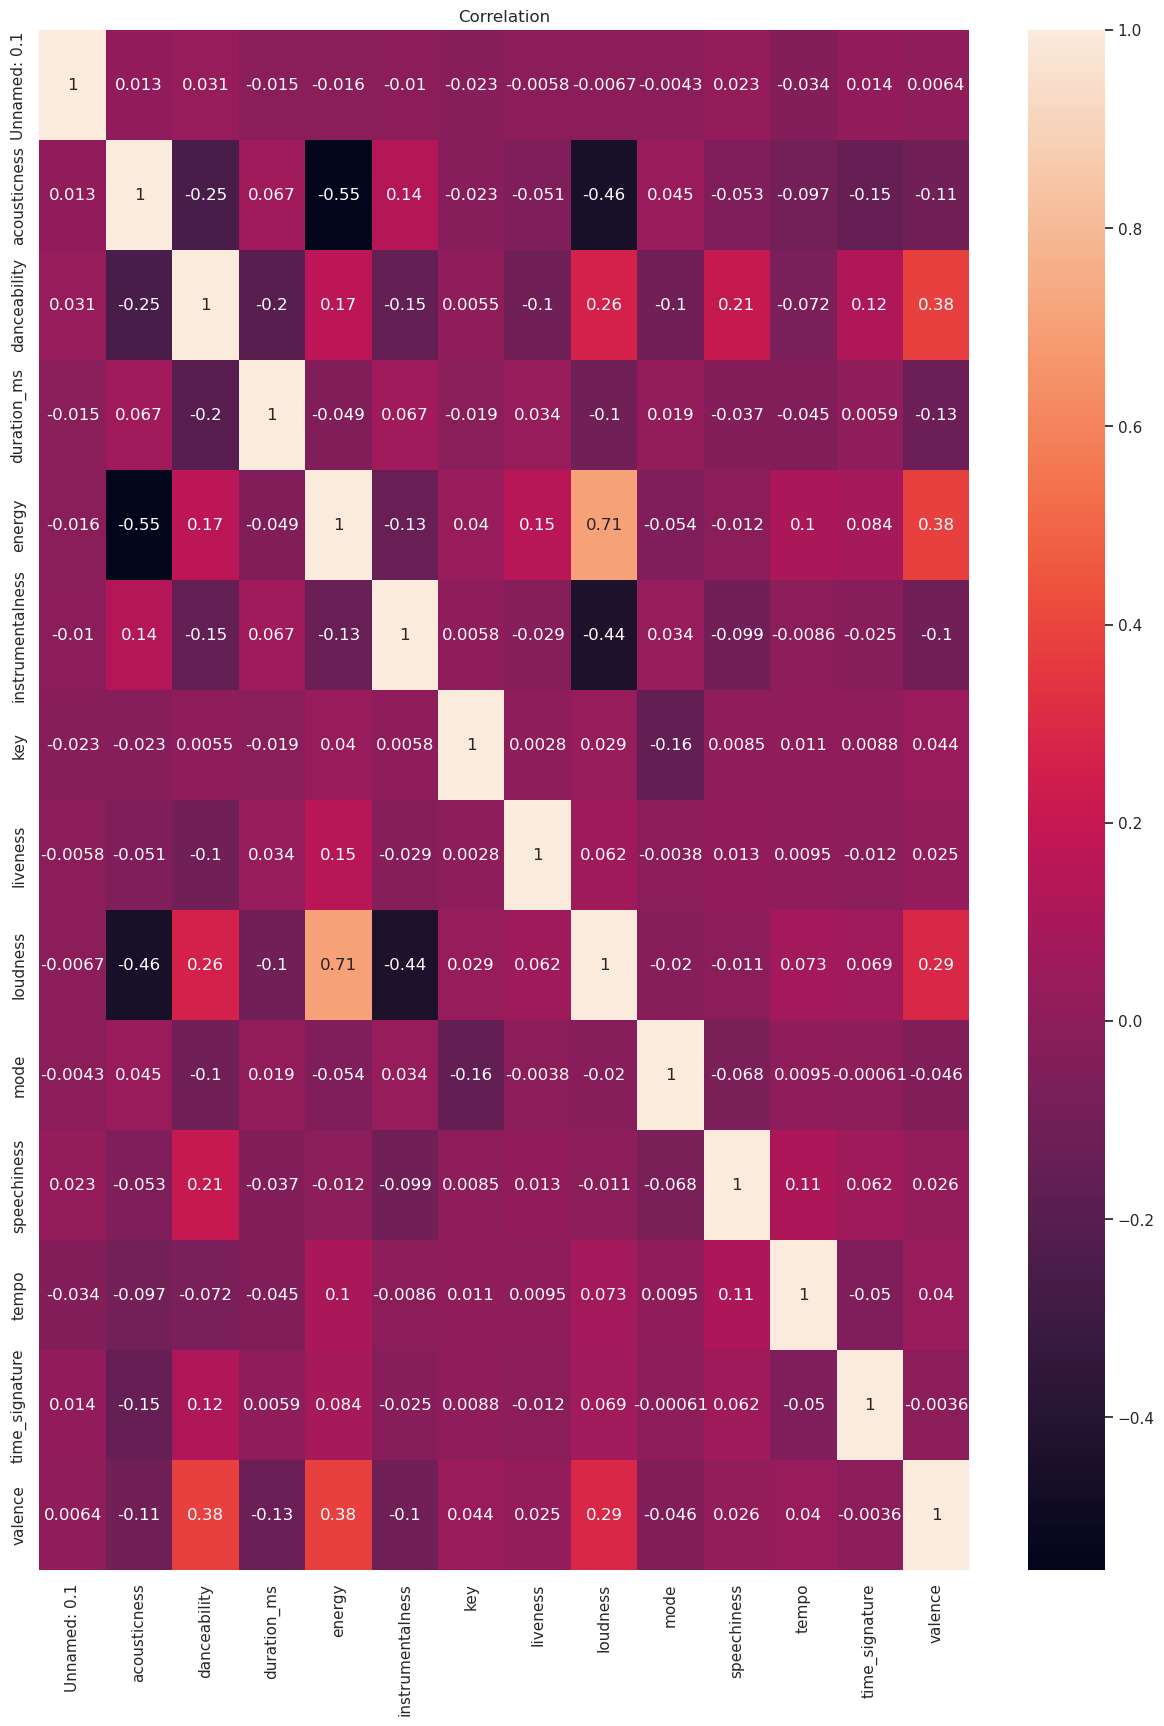

In [228]:
# Check heatmap before including more columns 
# Select only int and float columns

numeric_cols = df_spotify.select_dtypes(include=['int64', 'float64']).columns

drop_cols=['']

# Calculate the correlation matrix for numeric columns
corr_matrix = df_spotify[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation')
plt.show()

# Data Processing [Hildah/Cuong Nguyen] 

### Determine throwaway columns - For text enrichment @Cuong Nguyen
Dropped Unnamed: 0 because didnt seem valuable

Dropped 'analysis_url','track_href','uri' because it is a URL, identifiers of some sort

Dropped id becuase it is a unique identifier

Dropped 'search_type' becuase they all seamed to be track/artists

Dropped type becuase it is just the same = ['audio_features', nan]

KEpt artist and title because some contextually the artist and song titles may influence the dandeability in some way.



In [229]:
# Select potential columns to drop
potential_drop_columns=list()

for col in df_spotify:
    try:
        df_spotify[col] = pd.to_numeric(df_spotify[col])
        if len(df_spotify[col].unique())==1:
          potential_drop_columns.append(col)
    except Exception as e:
        potential_drop_columns.append(col)

print(potential_drop_columns)


['Unnamed: 0', 'analysis_url', 'artist', 'id', 'search_type', 'title', 'track_href', 'type', 'uri']


In [230]:
# Drop the other columns
potential_drop_columns.remove('artist')
print(potential_drop_columns)



['Unnamed: 0', 'analysis_url', 'id', 'search_type', 'title', 'track_href', 'type', 'uri']


In [231]:
# Drop the columns in df 
df=df_spotify
df=df.drop(potential_drop_columns,axis=1)

In [232]:
# Get the shape
df.shape 

(4109, 15)

### Processing categorical data @Cuong Nguyen for text enrichment

In [233]:
# One hot encode artists column

df = pd.get_dummies(df, columns=['artist'], prefix='', prefix_sep='')



In [234]:
df.head()

,Unnamed: 0.1,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,xxanteria,yuji,zzoilo,Ã½Ã½$,Ã½Ã½dith Piaf,Ã½Ã½engo Flow,Ã½Ã½neheart,Ã½Ã½wnboss,Ã½Ã½Ã½Ã½Ã½Ã½,Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½
0,0,0.00121,0.352,222973.0,0.911,0.000000,1.0,0.0995,-5.230,1.0,...,False,False,False,False,False,False,False,False,False,False
1,1,0.32900,0.616,259704.0,0.882,0.000002,5.0,0.1910,-6.568,1.0,...,False,False,False,False,False,False,False,False,False,False
2,2,0.03610,0.687,193507.0,0.781,0.000000,1.0,0.0755,-4.806,1.0,...,False,False,False,False,False,False,False,False,False,False
3,3,0.34100,0.719,147212.0,0.959,0.000000,9.0,0.2550,-5.290,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,0.05280,0.535,166507.0,0.859,0.000000,6.0,0.3200,-2.922,1.0,...,False,False,False,False,False,False,False,False,False,False


In [235]:
# Make columns into int - Don;t think this is necessary

# for col in df.columns:
#     try:
#         #df_[col] = df[col].str.replace(',', '').astype(int) #.astype('float64')
#         df[col] = pd.to_numeric(df[col],errors='coerce')
#     except Exception as e:
#         print("Skipped", col)
       

###  Development/justification of “danceability binary”. Maybe multiclass would be more fun?

In [236]:
def danceability_classifier(x):
    '''
      Classifies the danceability param to either 1-low, 2-medium or 3-High
      Args:
      x: input decimal denoting deacneabiluty

      Returns:
       Either of the int values in 1,2,3 representing 1-low, 2-medium or 3-High

    '''
    if x >= 0.7:
        return 3
    elif 0.4 <= x  <0.7:
        return 2
    else:
        return 1

### Standardized train, val, test splits. Maybe we put these as categories in the 

In [237]:
# Categorise the data set as Either danceable or not
#def danceable()
df['binary_danceability'] = df['danceability'].apply(danceability_classifier)

In [238]:
# Get the features and outcome variables separated

Y=pd.DataFrame(df['binary_danceability'])
df=df.drop(['binary_danceability'],axis=1)
X=pd.DataFrame(df)

In [239]:
Y.head()

,binary_danceability
0,1
1,2
2,2
3,3
4,2


In [240]:

X.head()

,Unnamed: 0.1,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,xxanteria,yuji,zzoilo,Ã½Ã½$,Ã½Ã½dith Piaf,Ã½Ã½engo Flow,Ã½Ã½neheart,Ã½Ã½wnboss,Ã½Ã½Ã½Ã½Ã½Ã½,Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½
0,0,0.00121,0.352,222973.0,0.911,0.000000,1.0,0.0995,-5.230,1.0,...,False,False,False,False,False,False,False,False,False,False
1,1,0.32900,0.616,259704.0,0.882,0.000002,5.0,0.1910,-6.568,1.0,...,False,False,False,False,False,False,False,False,False,False
2,2,0.03610,0.687,193507.0,0.781,0.000000,1.0,0.0755,-4.806,1.0,...,False,False,False,False,False,False,False,False,False,False
3,3,0.34100,0.719,147212.0,0.959,0.000000,9.0,0.2550,-5.290,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,0.05280,0.535,166507.0,0.859,0.000000,6.0,0.3200,-2.922,1.0,...,False,False,False,False,False,False,False,False,False,False


In [241]:
print("X shape:", X.shape,"Y shape:",Y.shape)

X shape: (4109, 1862) Y shape: (4109, 1)


In [244]:
# Convert to numpy array
X=np.array(X)
Y=np.array(Y)

In [245]:
# Shuffle data
# NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
tf.random.set_seed(1234)
np.random.seed(1234)

# shuffle data
indices = np.arange(Y.shape[0])
np.random.shuffle(indices)

# Re-order using the list of shuffled indices
X = X[indices]
Y = Y[indices]

In [246]:
# Split the (X,Y) data into training and test paritions
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

# EX2.2
# Print the shape of each array.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (2629, 1862)
X_test shape: (822, 1862)
X_val shape: (658, 1862)
Y_train shape: (2629, 1)
Y_test shape: (822, 1)
Y_val shape: (658, 1)


# Random Forest

In [247]:
# Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
 
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=2, n_jobs=1, random_state=0, max_depth=6, bootstrap=False)

# Train the model
rf_classifier.fit(X_train, Y_train)

y_train_pred=rf_classifier.predict(X_train)
# Make predictions on the validation set
y_val_pred=rf_classifier.predict(X_val)


# Calculate accuracy
train_acc = accuracy_score(Y_train, y_train_pred)
val_acc = accuracy_score(Y_val, y_val_pred)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print ("\n")



Training accuracy: 0.6416888550779765
Validation accuracy: 0.5379939209726444




/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

#Loss
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae) 

In [ ]:
#Plot the confusion matrix for test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
# Plot the confusion matrix for validation data
cm = confusion_matrix(Y_val, y_val_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# FFNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()


# Add layers to the model
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)



In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # hmn output dim
      #input_shape=(num_features,),  # hmn input dim
      input_dim=num_features,
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid', # hmn
      kernel_initializer='Ones',  # initialize params to 1
      bias_initializer='Ones',    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) #hmn

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile( optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')
    
  return model

In [ ]:
tf.random.set_seed(0)
# 2. Build and compile model
num_features = X_train.shape[1]
learning_rate = 0.0001
epochs=5
model_tf=build_model(num_features, learning_rate)


# 3. Fit the model
results=model_tf.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), verbose=True)

In [ ]:
print("\nFirst 5 Learned Parameters:")
for layer in model_tf.layers:
    print("\n",layer.get_weights()[0][:5]),
    print("\nBias term:",layer.get_weights()[1])


# EX 10.3 The loss at the final epoch on both the mini training and validation datasets;
print("\nLoss at Final Epoch:")
print('\nTraining Loss: ', results.history['loss'][-1])
print('\nValidation Loss:', results.history['val_loss'][-1])

# EX 10.4 The percentage difference between the losses observed on the mini training and validation datasets
loss_diff  =( results.history['loss'][-1]-results.history['val_loss'][-1] )/results.history['loss'][-1]
print(f'\nLoss Difference (%):, {loss_diff * 100:.2f} %')

# KMeans

In [ ]:
# set params
from sklearn.cluster import KMeans
df_cleaned = df.dropna()

n_clusters = 2
random_state = 10  # makes sure you get the same results each time

# create a np array for RBG values
#X = np.array(df_colors.values)

# define KMeans model
def fit_kmeans(X, n_clusters, random_state):
  ## EX 3.1 ## 
  model = KMeans(n_clusters=n_clusters, random_state=random_state)
  model.fit(X)
  return model

# fit KMeans model
## EX 3.2 Fit a KMeans model ## 
kmeans = fit_kmeans(Y, n_clusters, random_state)

# get cluster predictions
## EX 3.3 Get the cluster predictions## 
cluster_labels = kmeans.predict(Y)

# add predictions to df_colors
## EX 3.4 Add the cluster predictions ## 
# df_kmeans['cluster'] = cluster_labels

# Design
- create copy and coerce numeric
- Remove empty columns
-train, test, val split = Outcome variable explicit track
- randomize indeces


In [ ]:
fig_len=len(df.columns)
fig_len

In [ ]:
# Setup the figures for side-by-side histograms
fig=len(df.columns)


fig, axs = plt.subplots(4, 5, figsize=(20, 25))
k=0
j=0
for i in df.columns:
    axs[k][j].hist(df[i], bins=20, color='blue')
    axs[k][j].set_xlabel(i)
    axs[k][j].set_ylabel('Frequency')
    axs[k][j].set_title(i)
    if j==4:
        j=-1
        k+=1
    j+=1
    

plt.tight_layout()
plt.show()